In [2]:
# The Libaries that are used

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange

import seaborn as sns

from collections import defaultdict as dd

import math

In [3]:
traffic_volume = pd.read_csv('Traffic_Volume.csv')

# take only growth and name of LGA
traffic = traffic_volume[['LGA_SHORT_NM','GROWTH_RATE']]

# sums any duplicate LGA's together
summed = traffic.groupby("LGA_SHORT_NM").sum()

# reset the index to merge
summed = summed.reset_index()
#really lazy regex to remove parenthensisisisis
summed['LGA_SHORT_NM'] = summed['LGA_SHORT_NM'].str.replace(r'(', '')
summed['LGA_SHORT_NM'] = summed['LGA_SHORT_NM'].str.replace(r')', '')
summed
#summed.to_csv('traffic.csv', index=False)

,LGA_SHORT_NM,GROWTH_RATE
0,FALLS CREEK,0.024
1,LAKE MOUNTAIN,0.055
2,MOUNT BAW BAW,-0.082
3,MOUNT BULLER,-0.175
4,MOUNT STIRLING,0.030
...,...,...
80,WODONGA,1.098
81,WYNDHAM,6.753
82,YARRA,-1.005
83,YARRA RANGES,6.460


In [4]:
postcodes = pd.read_csv('Australian_Postcodes.csv')

# take only vic postcodes
vic = postcodes.loc[postcodes['state'] == 'VIC']

# only take postcode and suburb
vic = vic.iloc[:, 0:2] 
vic.columns = ['POSTCODE', 'LGA_SHORT_NM']
vic

#vic.to_csv('vic.csv', index=False)

,POSTCODE,LGA_SHORT_NM
5324,3000,MELBOURNE
5325,3001,MELBOURNE
5326,3002,EAST MELBOURNE
5327,3003,WEST MELBOURNE
5328,3004,MELBOURNE
...,...,...
16063,8626,CAMBERWELL
16064,8627,CAMBERWELL
16065,8785,DANDENONG
16066,8865,SOUTH MELBOURNE


In [5]:
# join the 2 df together
growth_rate = pd.merge(summed, vic, how="left",on=["LGA_SHORT_NM"])

# drop postcodes column as no longer needed
traffic_growth = growth_rate.drop("POSTCODE", axis=1)

#traffic_growth.to_csv('Traffic_Growth.csv', index=False)

# doesn't join all as some of the names are slightly different hMMM
traffic_growth



,LGA_SHORT_NM,GROWTH_RATE
0,FALLS CREEK,0.024
1,LAKE MOUNTAIN,0.055
2,MOUNT BAW BAW,-0.082
3,MOUNT BULLER,-0.175
4,MOUNT STIRLING,0.030
...,...,...
117,WODONGA,1.098
118,WYNDHAM,6.753
119,YARRA,-1.005
120,YARRA RANGES,6.460


In [101]:
population = pd.read_csv("Victorian_Population.csv")

# take relevant columns and rename to match 
population = population[['Local Government Area', '%']]
population.columns = ['LGA_SHORT_NM', 'POP_GROWTH_RATE']

# regex to remove brackets in LGA_SHORT_NM and change to uppercase

population['LGA_SHORT_NM'] = population['LGA_SHORT_NM'].str.upper()
population['LGA_SHORT_NM'] = population['LGA_SHORT_NM'].str.replace(r" \(.*\)","")


# drop empty rows 
population_growth = population.dropna()

#population_growth.to_csv('Population_Growth.csv', index=False)
population_growth

,LGA_SHORT_NM,POP_GROWTH_RATE
1,ALPINE,1.3
2,ARARAT,1.0
3,BALLARAT,1.7
4,BANYULE,0.2
5,BASS COAST,3.1
...,...,...
77,YARRA,1.6
78,YARRA RANGES,0.3
79,YARRIAMBIACK,-0.7
81,UNINCORPORATED VIC,1.5


In [110]:
# calculate only Interstate migration growth rate 

migration = pd.read_csv('Victorian_Population.csv')

migration = migration[['Net overseas migration no.','Net internal migration no.']]

migration = migration.transpose()


migration = migration.pct_change()
migration = migration.transpose()

migration = migration[['Net internal migration no.']]
migration = migration.dropna()
migration.columns = ['INTST_MG_GROWTH']

migration = migration.join(population_growth) 

migration = migration.iloc[:, 0:2:1] 

migration


,INTST_MG_GROWTH,LGA_SHORT_NM
1,1.442308,ALPINE
2,0.416667,ARARAT
3,1.550369,BALLARAT
4,-2.271762,BANYULE
5,11.517241,BASS COAST
...,...,...
77,-1.296029,YARRA
78,-2.916488,YARRA RANGES
79,-2.363636,YARRIAMBIACK
81,0.250000,UNINCORPORATED VIC


In [7]:
# merge the population_growth and traffic_grow together

In [8]:
# join the 2 df together
growth_rate = pd.merge(traffic_growth, population_growth, how="right",on=["LGA_SHORT_NM"])

growth_rate = growth_rate.dropna()
growth_rate = growth_rate.drop_duplicates()


# rename GROWTH_RATE TO TRAF_GROWTH_RATE
growth_rate = growth_rate.rename(columns={'GROWTH_RATE': 'TRAF_GROWTH_RATE'})

growth_rate.to_csv('Traffic_over_Pop_Growth.csv', index=False)

# doesn't join all as some of the names are slightly different hMMM
growth_rate


,LGA_SHORT_NM,TRAF_GROWTH_RATE,POP_GROWTH_RATE
0,ALPINE,1.327,1.3
1,ARARAT,0.925,1.0
2,BALLARAT,4.521,1.7
4,BANYULE,0.297,0.2
5,BASS COAST,2.476,3.1
...,...,...,...
102,WODONGA,1.098,1.4
104,WYNDHAM,6.753,4.7
105,YARRA,-1.005,1.6
106,YARRA RANGES,6.460,0.3


In [9]:
# split into 2 dfs

traf_growth_rate = growth_rate.iloc[:, 0:2] 
pop_growth_rate= growth_rate.iloc[:, 0:3:2] 


pop_growth_rate
traf_growth_rate


,LGA_SHORT_NM,TRAF_GROWTH_RATE
0,ALPINE,1.327
1,ARARAT,0.925
2,BALLARAT,4.521
4,BANYULE,0.297
5,BASS COAST,2.476
...,...,...
102,WODONGA,1.098
104,WYNDHAM,6.753
105,YARRA,-1.005
106,YARRA RANGES,6.460


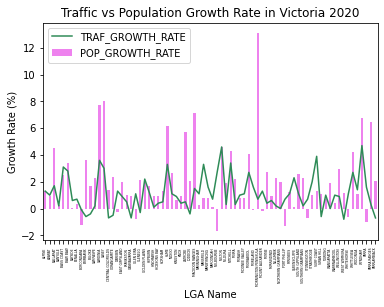

In [41]:
# traffic vs population growth graphing

ax = traf_growth_rate.plot(kind='bar',x='LGA_SHORT_NM', y='TRAF_GROWTH_RATE',color='violet')
pop_growth_rate.plot(ax=ax, x='LGA_SHORT_NM', y='POP_GROWTH_RATE',color='seagreen')
plt.title("Traffic vs Population Growth Rate in Victoria 2020")
plt.ylabel("Growth Rate (%)")
plt.xlabel("LGA Name")
plt.xticks(x="LGA_SHORT_NM", rotation='vertical')

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=3)

plt.savefig('Traffic_Growth.png',bbox_inches='tight',dpi=150)



In [11]:
growth_rate.corr()

,TRAF_GROWTH_RATE,POP_GROWTH_RATE
TRAF_GROWTH_RATE,1.00000,0.29354
POP_GROWTH_RATE,0.29354,1.00000


In [12]:
# attempt at heatmap 1

                        Traffic_Growth_Rate  Population_Growth_Rate
Traffic_Growth_Rate                1.000000                0.089136
Population_Growth_Rate             0.089136                1.000000


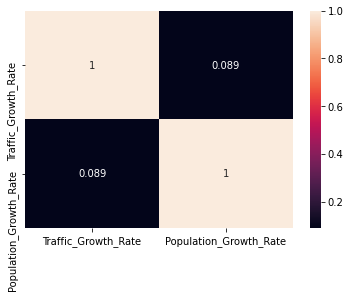

In [13]:


Traffic_Growth = []
for i in growth_rate['TRAF_GROWTH_RATE']:
    Traffic_Growth.append(i)

Population_Growth = []
for i in growth_rate['POP_GROWTH_RATE']:
    Population_Growth.append(i)
    
    
df = pd.DataFrame({'Traffic_Growth_Rate': Traffic_Growth,
                   'Population_Growth_Rate': Population_Growth})



corr = df.corr('spearman')

print(corr)

sns.heatmap(corr, annot = True)

plt.show()


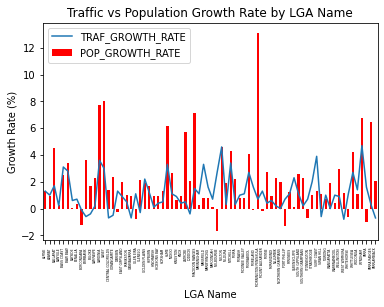

In [35]:
#plotting traffic growth over population growth

ax = traf_growth_rate.plot(kind='bar',x='LGA_SHORT_NM', y='TRAF_GROWTH_RATE',color='red')
pop_growth_rate.plot(ax=ax, x='LGA_SHORT_NM', y='POP_GROWTH_RATE')
plt.title("Traffic vs Population Growth Rate by LGA Name")
plt.ylabel("Growth Rate (%)")
plt.xlabel("LGA Name")
plt.xticks(x="LGA_SHORT_NM", rotation='vertical')

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=3)

plt.savefig('Traffic_Growth.png',bbox_inches='tight',dpi=150)



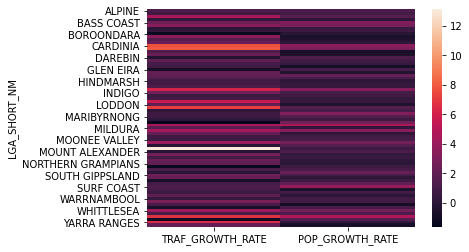

In [27]:
# heatmap without correlation matrix
df = growth_rate.set_index("LGA_SHORT_NM")
df
sns.heatmap(df)

In [29]:
df = growth_rate.set_index("LGA_SHORT_NM")
df_t = df.iloc[:,0:1]
df_t = df_t.transpose()


In [30]:
df = growth_rate.set_index("LGA_SHORT_NM")
df_p = df.iloc[:,0:1]
df_p = df_p.transpose()

In [120]:
df = growth_rate.set_index("LGA_SHORT_NM")
df = df.transpose()


rand_df = df.sample(n=15,axis='columns')
corr = rand_df.corr('spearman')

#print(corr)

#sns.heatmap(corr, annot = True)

#plt.show()
df

LGA_SHORT_NM,ALPINE,ARARAT,BALLARAT,BANYULE,BASS COAST,BAW BAW,BAYSIDE,BENALLA,BOROONDARA,BRIMBANK,...,WARRNAMBOOL,WELLINGTON,WEST WIMMERA,WHITEHORSE,WHITTLESEA,WODONGA,WYNDHAM,YARRA,YARRA RANGES,YARRIAMBIACK
GROWTH_RATE,1.327,0.925,4.521,0.297,2.476,3.414,0.058,0.372,-1.211,3.589,...,0.435,2.971,1.178,-0.617,4.19,1.098,6.753,-1.005,6.46,2.068
POP_GROWTH_RATE,1.300,1.000,1.700,0.200,3.100,2.800,0.600,0.700,-0.100,-0.600,...,1.000,0.900,-0.800,1.100,2.70,1.400,4.700,1.600,0.30,-0.700


Text(0.5, 1.0, 'Correlation Heatmap of Suburb vs Traffic vs Migration Growth Rate')

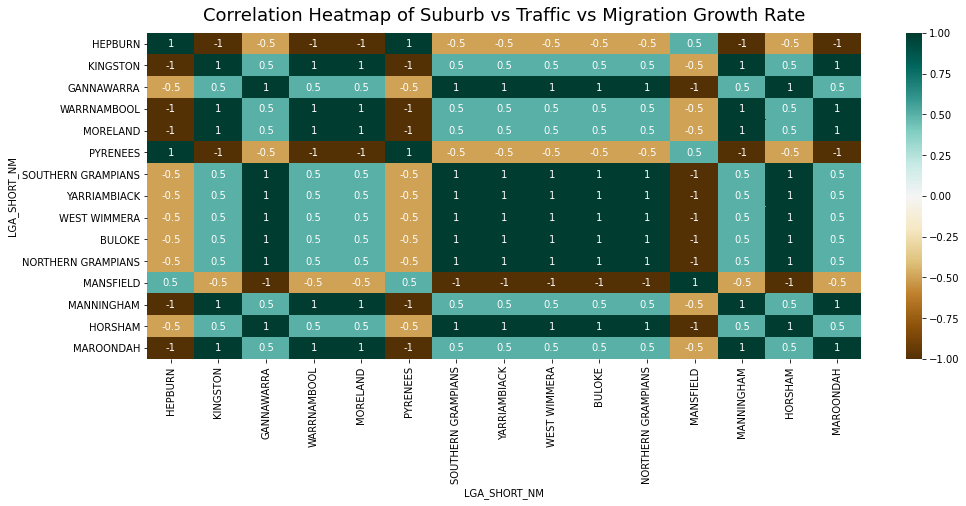

In [123]:
# merge the 2 dataframes to use for heatmap 

merged = pd.merge(growth_rate, migration, how="right", on=['LGA_SHORT_NM'])
merged = merged.dropna()
merged = merged.drop_duplicates()

merged = merged.set_index("LGA_SHORT_NM")
merged = merged.transpose()

rand_merged = merged.sample(n=15, axis='columns')
corr = rand_merged.corr('spearman')

plt.figure(figsize=(16,6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap of Suburb vs Traffic vs Migration Growth Rate', fontdict={'fontsize':18}, pad=12)



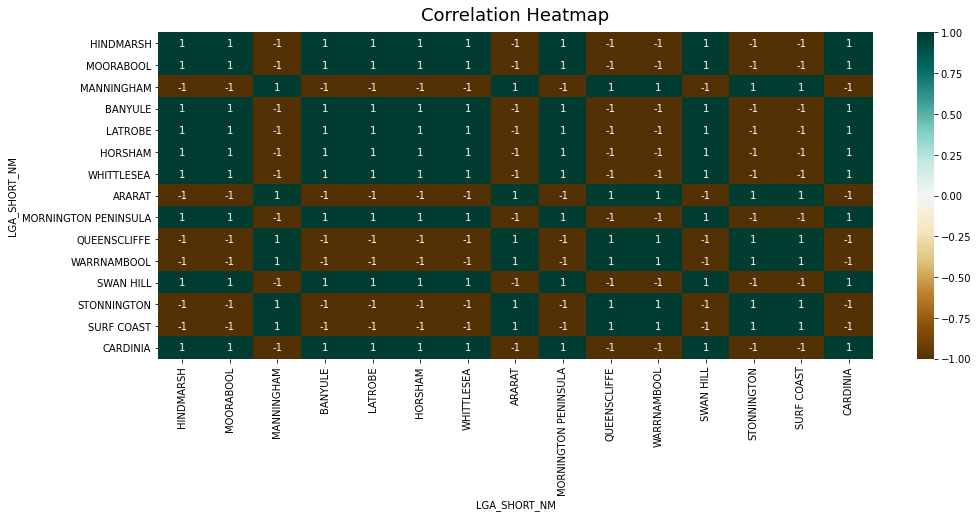

In [44]:
# this correlation heatmap is inaccurate and doesn't show much 

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(rand_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);